<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='40%'></img>

<br>


<a href="./11_sentinel3_nrt_slstr_frp_Californian_fires.ipynb"><< 11 - Sentinel-3 NRT SLSTR FRP - Californian Fires </a><span style="float:right;"><a href="./21_sentinel3_nrt_slstr_frp_exercise.ipynb">Sentinel-3 NRT SLSTR FRP - Exercise >></a></span>

<div class="alert alert-block alert-warning">
<b>WORKFLOW</b></div>

# Sentinel-3 Near Real Time SLSTR Aerosol Optical Depth (AOD)

The [Copernicus Sentinel-3 Near Real Time Aerosol Optical Depth (AOD)](https://www.eumetsat.int/website/home/News/DAT_5150095.html) product quantifies the abundance of all aerosol particles suspended in the air and monitors their global distribution and long-range transport, at the scale of 9.5 x 9.5 km2. 

It is only applicable during daytime. The current version of the NRT S3 AOD product is considered as 'preliminary operational' over ocean surfaces, and 'demonstrational' over land surfaces. It is only applicable during daytime

All these observations are made available in less than three hours from the SLSTR observation sensing time.

The following workflow is based on an example of `Sentinel-3 Near Real Time SLSTR AOD` data on 1 October 2020. As a comparison, you see below the Sentinel-3 OLCI Red Green Blue composites for the same day, which clearly shows the smoke plumes along the Californian coast resulting from the fires.
 

<br>


<div style='text-align:center;'>
<figure><img src='./img/s3_aod_1001.png' width='80%'/>
    <figcaption><i>RGB composites of Sentinel-OLCI Level 1 data on 1 October 2020</i></figcaption>
</figure>
</div>
   

<hr>

### Outline
  
  
* [Example: Californian Fires - October 2020](#californian_fires)
  * [1 - Load Sentinel-3 SLSTR AOD data](#load_cal)
  * [2 - Extract AOD variables](#extract_cal)
  * [3 - Visualize AOD Ocean and AOD land information](#visualize_cal)

<hr>

#### Load required libraries

In [2]:
import xarray as xr

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as pltfacebook
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

<hr>

# <a id='californian_fires'></a>Example: Californian fires in October 2020

## <a id='load'></a>Load Sentinel-3 SLSTR AOD data

The Near-Real-Time Sentinel-3 Aerosol Optical Depth data are disseminated in `netCDF`. `netCDF` data can be loaded with the Python library [xarray](http://xarray.pydata.org/en/stable/) and its function `xr.open_dataset()`. 

You see that the data file contains two `dimensions`:
* `columns` and
* `rows`.

It further contains an long list of `data variables`, including:
* `AOD_550`,
* `AOD_550_uncertainty`,
* `AOD_550_Ocean_NonFiltered`,
* `AOD_550_Land_Experimental_PostFiltered`,
...

A data file also contains a set of `attributes`, which give you more information about the data file and the data it contains, e.g the `start_time` and `stop_time` or the `product_name`.

In [3]:
file = xr.open_dataset('./eodata/AOD_California_20201001.nc')
file

<xarray.Dataset>
Dimensions:                                                (columns: 157, rows: 210)
Dimensions without coordinates: columns, rows
Data variables:
    AOD_550                                                (rows, columns) float32 ...
    AOD_550_uncertainty                                    (rows, columns) float32 ...
    AOD_670                                                (rows, columns) float32 ...
    AOD_865                                                (rows, columns) float32 ...
    AOD_1600                                               (rows, columns) float32 ...
    AOD_2250                                               (rows, columns) float32 ...
    FM_AOD550                                              (rows, columns) float32 ...
    AFRI                                                   (rows, columns) float32 ...
    Smoke_Index                                            (rows, columns) float32 ...
    ANG550_865                                       

### <a id='extract'></a>Extract Aerosol Optical Depth variables

The next step is to extract the variables of interest. Let us select the following two variables:
* `AOD_550`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers ocean surfaces.*)
* `AOD_550_Land_Experimental_PostFiltered`: it is the Aerosol Optical Depth at 550nm. (*Note: it only covers land surfaces.*)

Both `DataArrays` have two dimensions (`rows` and `columns`) and the following attributes, which provide additional information about the variables:
* `long_name`
* `standard_name`
* `valid_min`
* `valid_max`
* `coordinates`

In [4]:
aod_ocean = file.AOD_550
aod_land = file.AOD_550_Land_Experimental_PostFiltered
print(aod_ocean)
print(' ')
print(aod_land)

<xarray.DataArray 'AOD_550' (rows: 210, columns: 157)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Aerosol optical thickness at 550 nm - Best quality (post-...
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol
    valid_min:      0.0
    valid_max:      4.001
    coordinates:    latitude, longitude
 
<xarray.DataArray 'AOD_550_Land_Experimental_PostFiltered' (rows: 210, columns: 157)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan,

You can also load `latitude` and `longitude` information, which can be used later for visualizing the variables.

In [5]:
lat_nc = file.latitude
lon_nc = file.longitude
print(lat_nc)
print(' ')
print(lon_nc)

<xarray.DataArray 'latitude' (rows: 210, columns: 157)>
array([[40.54374 , 40.533485, 40.523174, ..., 37.763252, 37.73665 , 37.71009 ],
       [40.46065 , 40.45038 , 40.44005 , ..., 37.676662, 37.649994, 37.62782 ],
       [40.377556, 40.367268, 40.35692 , ..., 37.593685, 37.571865, 37.54554 ],
       ...,
       [23.316261, 23.302357, 23.288424, ..., 20.575003, 20.553972, 20.533533],
       [23.232931, 23.21901 , 23.205057, ..., 20.492165, 20.4701  , 20.45003 ],
       [23.1496  , 23.13566 , 23.121693, ..., 20.407766, 20.387156, 20.366516]],
      dtype=float32)
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Latitude at pixel centre
    standard_name:  latitude
    units:          degrees_north
    valid_min:      -90.0
    valid_max:      90.0
 
<xarray.DataArray 'longitude' (rows: 210, columns: 157)>
array([[-132.85818 , -132.74686 , -132.63556 , ..., -116.28708 , -116.182686,
        -116.08103 ],
       [-132.87125 , -132.76007 , -132.6489  , ..., -1

### <a id='visualize'></a> Visualize AOD Ocean and AOD Land variables

The final step is to visualize both variables, Aerosol Optical Depth over ocean and land together in one plot. You can use matplotlib's function `pcolormesh` for it.

Let us define a visualisation function called [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh) which visualizes both AOD variables together onto a map. The function takes the following keyword arguments (kwargs):
* `aod_ocean`: DataArray with AOD values over ocean
* `aod_land`: DataArray with AOD values over land
* `latitude`: DataArray with latitude information
* `longitude`: DataArray with longitude information
* `title`: Title of the plot
* `unit`: Unit of AOD
* `vmin` and `vmax`: Minimum and maximum values to be displayed on the map
* `color_scale`: Color scale the data shall be represented
* `projection`: Projection of the map

In [6]:
def visualize_pcolormesh(aod_ocean, aod_land, latitude, longitude, title, unit, vmin, vmax, color_scale, projection):
    fig=plt.figure(figsize=(12, 12))

    ax=plt.axes(projection=projection)
    ax.coastlines(linewidth=1.5, linestyle='solid', color='k', zorder=10)

    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlabels_top=False
    gl.ylabels_right=False
    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    gl.xlabel_style={'size':12}
    gl.ylabel_style={'size':12}


    img1 = plt.pcolormesh(longitude, latitude, aod_ocean, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=color_scale)
    img2 = plt.pcolormesh(longitude, latitude, aod_land, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=color_scale)
    ax.set_title(title, fontsize=20, pad=20.0)

    cbar = fig.colorbar(img1, ax=ax, orientation='vertical', fraction=0.04, pad=0.05)
    cbar.set_label(unit, fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    plt.show()

Now, let us apply the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh) to visualize both variables, AOD Ocean and AOD Land.

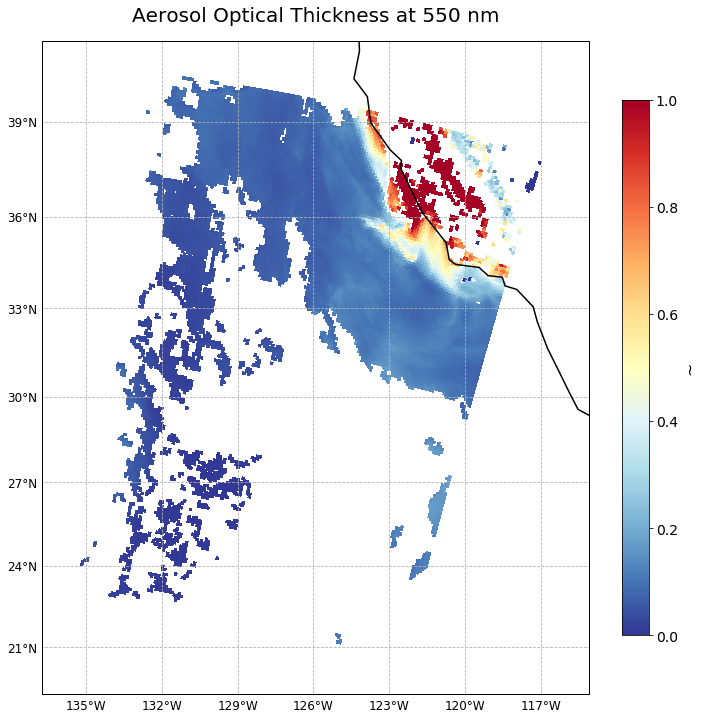

In [7]:
visualize_pcolormesh(aod_ocean, 
                     aod_land, 
                     lat_nc, lon_nc, 
                     'Aerosol Optical Thickness at 550 nm', 
                     '~', 
                     0.,
                     1.0,
                     cm.RdYlBu_r,
                     ccrs.Mercator())

<br>

<br>

<a href="./11_sentinel3_nrt_slstr_frp_Californian_fires.ipynb"><< 11 - Sentinel-3 NRT SLSTR FRP - Californian Fires </a><span style="float:right;"><a href="./21_sentinel3_nrt_slstr_frp_exercise.ipynb">Sentinel-3 NRT SLSTR FRP - Exercise >></a></span>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.